In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

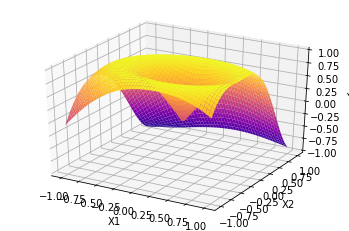

In [3]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [217]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [218]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.0280172404956631


100 Error =  0.298633015867132


200 Error =  0.0911414276397863


300 Error =  0.04862050368421955


400 Error =  0.04089532632209802


500 Error =  0.03889983197199222


600 Error =  0.03848024063295897


700 Error =  0.03841362359707873


800 Error =  0.038403967664298884


900 Error =  0.03840308463427612


1000 Error =  0.03840306841075534


1100 Error =  0.038403068078004046


TclError: invalid command name "pyimage259"

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

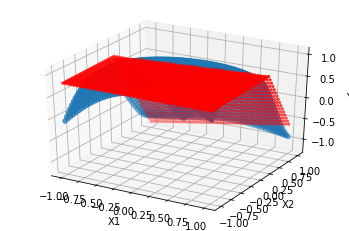

In [219]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [220]:
layer1.weights, layer2.weights

(array([[-0.10328917],
        [ 0.85506422]]), array([[-2.73948425],
        [ 0.03975281]]))

In [8]:
outs = []
for i in range(n_hidden):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

# Repeat steps below to add new neuron to the network

In [221]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [283]:
layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

In [284]:
l1_add = tnn.LinearLayer(2, 1, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(1, 1, optimizer=optimizer)

In [285]:
new_w1 = np.hstack([layer1.weights, l1_add.weights])
new_w1

array([[ 0.16136902,  1.29464768, -1.07174649, -1.24307261, -1.50458278,
        -0.90156845,  1.01633775],
       [ 0.67595178, -1.24165877, -1.40734577, -0.38544966,  0.16742162,
         2.84538605,  0.89627465]])

In [286]:
new_b1 = np.hstack([layer1.bias, l1_add.bias])
new_b1

array([-0.20720426, -0.66858287, -0.22165789, -0.80569757, -0.15558085,
       -0.40834387,  0.        ])

In [287]:
i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o), l2_add.weights.reshape(2,i_//2,o_)*0], axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_w2

array([[-2.54584444],
       [ 1.00391038],
       [ 0.38182128],
       [-0.84628735],
       [-0.35065548],
       [-0.4644118 ],
       [ 0.        ],
       [ 0.23080506],
       [ 0.02810807],
       [-0.51284998],
       [ 0.41125527],
       [ 0.16985114],
       [ 0.25028019],
       [-0.        ]])

In [288]:
new_b2 = deepcopy(layer2.bias)
new_b2

array([1.31831618])

## Creating a new network with added neuron

In [289]:
## creating new network with added neuron
optimizer = tnn.Adam()
# n_hidden = 2
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)

In [290]:
# %matplotlib tk
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)

# yout = net.forward(xx)
# ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

In [291]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch == 0:
        print(layer2.del_weights[layer2.weights.shape[0]//2-1], layer2.del_weights[-1])
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

[0.00124378] [-0.00082359]
0 Error =  0.009013933146204243


100 Error =  0.008761733041675195


200 Error =  0.007799227690558402


300 Error =  0.007442170829007068


400 Error =  0.007359919239197018


500 Error =  0.007301419063180214


600 Error =  0.007265457012306754


700 Error =  0.0072365021379341915


800 Error =  0.0071981909966265705


900 Error =  0.0071155730107137286


1000 Error =  0.0070477697507912995


1100 Error =  0.007039438642185547


1200 Error =  0.007038563334208305


1300 Error =  0.007038868506714236


1400 Error =  0.007038642550729917


1500 Error =  0.007038546628572498


1600 Error =  0.007038115506946776


1700 Error =  0.007038536620902238


1800 Error =  0.007031463242842537


1900 Error =  0.007020696080436853


2000 Error =  0.007008034217983683


2100 Error =  0.0070031809676709585


2200 Error =  0.007118775315070329


2300 Error =  0.007002938299072711


2400 Error =  0.007002939670860044


2500 Error =  0.007004669286103044


2600 Error =  0.00

TclError: invalid command name "pyimage329"

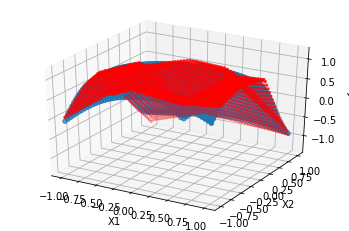

In [292]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [293]:
layer2.weights

array([[-2.75563265],
       [ 0.7652971 ],
       [ 0.39991938],
       [-0.8979769 ],
       [-0.61651969],
       [-0.27012693],
       [-0.33836217],
       [ 0.31739626],
       [-0.04809166],
       [-0.55401537],
       [ 0.33188754],
       [ 0.24028934],
       [ 0.1019798 ],
       [ 0.11902732]])

In [294]:
layer1.weights

array([[-0.03836483,  1.32276994, -0.9119794 , -0.81711862, -1.60784988,
        -1.94192447,  1.66444593],
       [ 0.82201537, -0.98508101, -1.50483163, -0.68172414, -0.7044916 ,
         2.59352964,  1.5438529 ]])

#### If the additional neuron was not helpful, reset the network

In [289]:
### rest if the neuron added is not good enough
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

### Plot the independent non-linear units (neurons)

In [49]:
outs = []
for i in range(len(layer1.bias)):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [50]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network end to end

In [295]:
n_hidden = len(layer1.bias)
n_hidden

11

In [296]:
## creating new network with added neuron
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

In [297]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5478159969178776


100 Error =  0.021579023378722518


200 Error =  0.01565208745692147


300 Error =  0.010445673700101686


400 Error =  0.007731488352603373


500 Error =  0.0071533967425648


600 Error =  0.006551826878365467


700 Error =  0.006249716245710482


800 Error =  0.0060481816939894585


900 Error =  0.005775691489370389


1000 Error =  0.005439062910399966


1100 Error =  0.004499680639089546


1200 Error =  0.003997031049987772


1300 Error =  0.0038498274720964666


1400 Error =  0.0037571028235420384


1500 Error =  0.003690688396102436


1600 Error =  0.003642531562238269


1700 Error =  0.00360645870835324


1800 Error =  0.0035788027281062882


1900 Error =  0.003554838963925606


2000 Error =  0.0035382347597906643


2100 Error =  0.0035391241952844703


2200 Error =  0.003514303637016338


2300 Error =  0.0035023625137458425


2400 Error =  0.003495331538302556


2500 Error =  0.0034706045233346854


2600 Error =  0.0034648761881058304


2700 Error

TclError: invalid command name "pyimage430"